In [24]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
#Exponential PDF
def exp_pdf(t,tau):
    return (1./tau)*np.exp(-t/tau)

#Function draws random number from exponential distribution using box method
def exp_random(tau,t_range,n):
    distribution = []
    a,b = t_range
    fmax = 1./tau #define the range of the "box"
    
    #while loop ensures n numbers are returned
    while len(distribution) < n:
        x1 = a+(b-a)*np.random.uniform(1,0) #defines a random number in the range [a,b]
        y1 = exp_pdf(x1,tau) #corresponding y1 in the exp distribution
        y2 = np.random.uniform(1,0)*fmax #Random number inside "box"
        
        #if statement only returns y2 values within distribution 
        if y2 < y1:
            distribution.append(x1)
            
    return distribution

#Function draws random number from exponential distribution using inverse method
def exp_inverse_random(tau,t_range,n):
    distribution = []
    a,b = t_range #define the time range
    
    y_01 = np.random.uniform(0,1,n) #generate n random numbers between 0 and 1
    y = (1-np.exp(-b/tau))*y_01 #converts random number to value in CDF
    x = -tau*np.log(1-y) #Finds the corresponding inverse value 
    distribution.append(x)
    
    return distribution
    
    
    

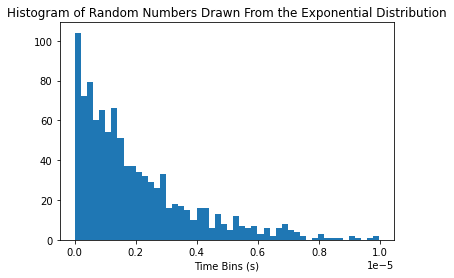

In [71]:
tau = 2.2e-6 #Muon lifetime
t_range = [0,1e-5] #Range between 0 & 10 us
n = 1000 #number of random numbers we want

dist = exp_random(tau,t_range,n) #Using the Box method to draw random numbers

plt.hist(dist,bins=50) #check to ensure the distribution looks correct
plt.title("Histogram of Random Numbers Drawn From the Exponential Distribution")
plt.xlabel("Time Bins (s)")
plt.show() 
#The distribution appears exponential!

In [27]:
tau_est = np.mean(dist)
print("Estimated muon lifetime, tau = " +str(tau_est)+" s")

Estimated muon lifetime, tau = 2.0759628809934592e-06 s


The muon lifetime displayed here is lower than the real one due to the constraint of using 10$\mu$s as the time range. The majority of the decay time values lie a little below the actual value but a few lie well above, which we have cut out of the analysis. Once these are taken into account, the average value will land closer to the real one of 2.2$\mu$s. I shall demonstrate this below:

In [73]:
t_range2=[0,1e-3] #0 to 1 ms
better_tau_est = np.mean(exp_random(tau,t_range2,n))
print("Estimated muon lifetime, tau = " +str(better_tau_est)+" s")

#Takes longer to run but it is a much better value

Estimated muon lifetime, tau = 2.1885379504058814e-06 s


In [28]:
tau_collection = []
tau_collection2 = []
m=500

#for loop to compute 500 taus
for i in range(m):
    tau_collection.append(np.mean(exp_random(tau,t_range,n))) #box method
    tau_collection2.append(np.mean(exp_inverse_random(tau,t_range,n))) #inverse cumulative method

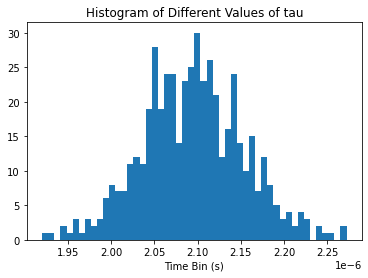

In [33]:
plt.hist(tau_collection,bins=50)
plt.title("Histogram of Different Values of tau")
plt.xlabel("Time Bin (s)")
plt.show()

#The histogram is a Gaussian distribution 

In [35]:
print("Values found using the Box Method:")
print("")
print("Mean of the distribution = "+str(np.mean(tau_collection))+" s")
print("Standard Deviation of the distribution = "+str(np.std(tau_collection)))
print("Standard Error of the mean = "+str(np.std(tau_collection)/np.sqrt(m))) #std/sqrt(m)
print("Bias = "+str(abs(np.mean(tau_collection2)-2.2e-6)))

Values found using the Box Method:

Mean of the distribution = 2.094436188820505e-06 s
Standard Deviation of the distribution = 5.8625173266368737e-08
Standard Error of the mean = 2.6217974523260776e-09
Bias = 1.0808227943578369e-07


In [36]:
print("Values found using the Inverse Cumulative Method:")
print("")
print("Mean of the distribution = "+str(np.mean(tau_collection2))+" s")
print("Standard Deviation of the distribution = "+str(np.std(tau_collection2)))
print("Standard Error of the mean = "+str(np.std(tau_collection2)/np.sqrt(m)))
print("Bias = "+str(abs(np.mean(tau_collection2)-2.2e-6)))

Values found using the Inverse Cumulative Method:

Mean of the distribution = 2.0919177205642164e-06 s
Standard Deviation of the distribution = 6.03943003969664e-08
Standard Error of the mean = 2.700915222823188e-09
Bias = 1.0808227943578369e-07


The method is biased in the lower direction due to the small time interval of 10$\mu$s cutting off higher decay times. The most accurate value you can obtain with a single experiment for tau is a value of the mean within the standard deviation whereas the error on the bias is the same as the standard error of the mean.

## Stretch Material

In [56]:
#adding background

def gaussian(x,u,sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-u)/sigma)**2)
    

def background(t_range,u,sigma,n,X):
    distribution = []
    a,b = t_range
    fmax = 1./tau 
    
    while len(distribution) < n:
        x1 = a+(b-a)*np.random.uniform(1,0) 
        y1 = X*exp_pdf(x1,tau) + (1-X)*gaussian(x1,u,sigma) 
        y2 = np.random.uniform(1,0)*fmax 
        
        if y2 < y1:
            distribution.append(x1)
            
    return distribution
    

In [57]:
n=1000
t_range=[0,1e-5]
u=0
sigma=1e-6
tau2=3e-6
X=0.91

back = background(t_range,u,sigma,n,X)

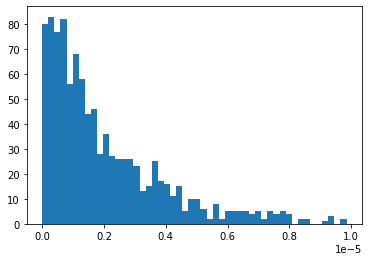

In [59]:
plt.hist(back,bins=50)
plt.show()

In [63]:
tau_background = []
m=500

#for loop to compute 500 taus
for i in range(m):
    tau_background.append(np.mean(background(t_range,u,sigma,n,X)))

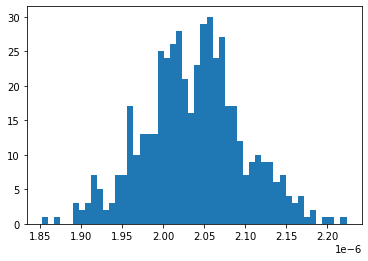

In [64]:
plt.hist(tau_background,bins=50)
plt.show()

In [65]:
#adding time acceptance

G=0.1*tau

def background_time(t_range,u,sigma,n,X,G):
    distribution = []
    a,b = t_range
    fmax = 1./tau 
    
    while len(distribution) < n:
        x1 = a+(b-a)*np.random.uniform(1,0) 
        p1 = X*exp_pdf(x1,tau) + (1-X)*gaussian(x1,u,sigma) 
        y1 = p1*(1-np.exp(-x1/G))
        y2 = np.random.uniform(1,0)*fmax 
        
        if y2 < y1:
            distribution.append(x1)
            
    return distribution

back_time = background_time(t_range,u,sigma,n,X,G)

In [67]:
tau_background_time = []
m=500

#for loop to compute 500 taus
for i in range(m):
    tau_background_time.append(np.mean(background_time(t_range,u,sigma,n,X,G)))

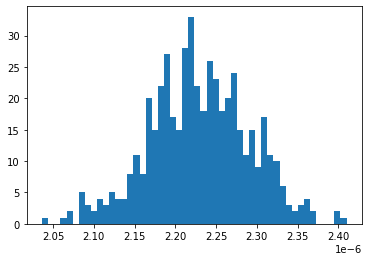

In [68]:
plt.hist(tau_background_time,bins=50)
plt.show()